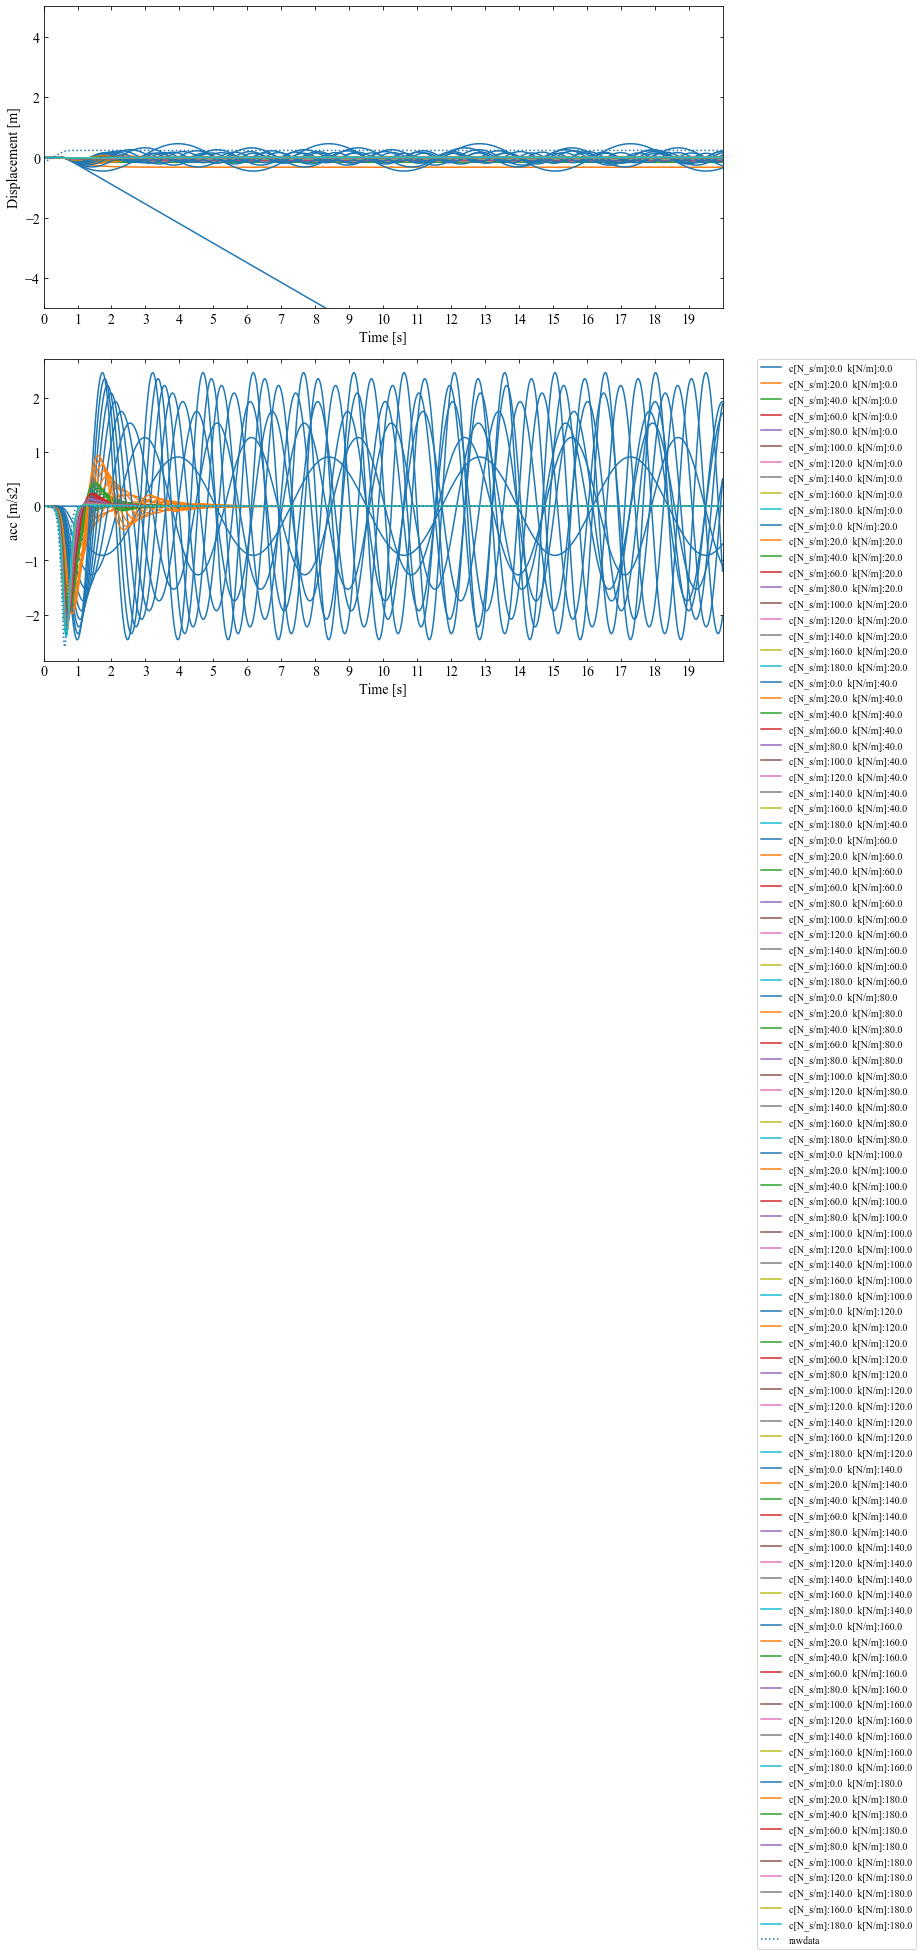

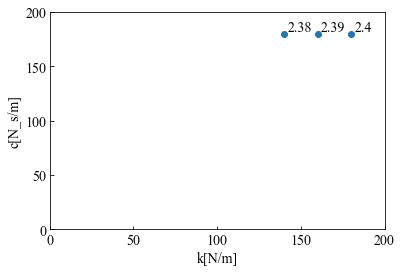

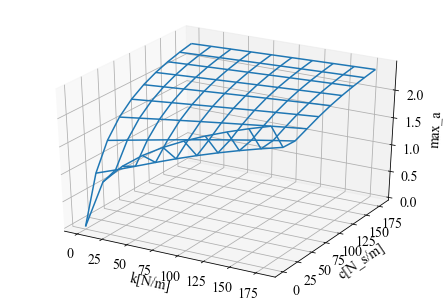

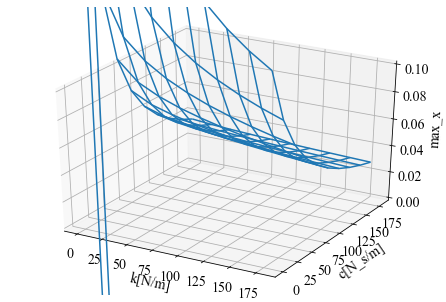

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.interpolate import griddata
from matplotlib import cm

b = 8
# a = 2 / 0.65
a = 3.077

def funcx(t):
    return (-1 / b * np.log(np.cosh(b * t - 5)) + t) / 3.077
#     return np.log(np.cosh( t -5)) 

def diff_funcx(t):
    return ( -1* np.tanh((b * t - 5 )) + 1) / 3.077

def func(state,t, m, k, c ):
#     x1, x2,dx2dt  = state
    x2,v2  = state
#     x1 = np.log(np.cosh( t -5)) 
#     v1 = np.tanh(n *t-5 ) 
#     a1 = n - n * pow( v1 ,2 )
#     a2 = a1 + c /m * ( v1 - v2 ) + k /m * ( x1 - x2  )
    x1 = funcx(t)
    v1 = diff_funcx(t)
    a2 = c /m * ( v1 - v2 ) + k /m * ( x1 - x2  )
    return [v2, a2]


def diff(x):
    v = []
    for i in range(len(t)-1):
        v = np.append(v,(x[i +1] - x[i]) / dt )
    v=np.append(v,v[len(v) -1])
    return v

# print(len(- 1 / (a * b) * np.log(np.cosh(b * t - 5)) + t / a ))
# print(len(- 1 / a * np.tanh((b * t - 5 )) + 1 /a ))

t0 = 0                          # 初期時間[s]
tf = 20                         # 終了時間[s]
dt = 0.005                      # 時間刻み[s]
t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002

state0 = [funcx(t0), diff_funcx(t0)  ]    # 初期値[x0, v0 ]

# ここからグラフ描画
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(221)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Displacement [m]')

# データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, tf, 0.005 *tf *10))
# ax1.set_yticks(np.arange(-1, 1, 0.1))
ax1.set_xlim(0, tf)
ax1.set_ylim(-5, 5)

ax2 = fig.add_subplot(223)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('acc [m/s2]')

# データの範囲と刻み目盛を明示する。
ax2.set_xticks(np.arange(0, tf, 0.005 *tf *10))
ax2.set_xlim(0, tf)

# データプロット
labeling = ["f = 1[Hz]", "f = 7[Hz]", "f = 20[Hz]"]
# c_list = [""]


m = 10   # 質量[kg]

max_a_list = []
max_x_list = []

calc_k_list =[]
calc_c_list =[]

for k in range(0, 200,20):
# for k in range(2, 3, 5):
#     k = 50
#     for c in range(0, 1, 1):
    for c in range(0, 200, 20 ):
#         c =1
        calc_k = k/1
        calc_c = c/1
        calc_k_list = np.append(calc_k_list,calc_k)
        calc_c_list = np.append(calc_c_list,calc_c)
        sol = odeint(func, state0, t, args=(m, calc_k , calc_c))
        label_ck = "c[N_s/m]:" + str(calc_c) + "  k[N/m]:" + str(calc_k)
#             label_a = label_ck + "x"
#         ax1.plot(t, sol[:, 0], label=label_ck )  # 絶対変位量
        x_list = funcx(t) - sol[:, 0]
#         x_list = sol[:, 0]
        ax1.plot(t, x_list, label=label_ck )  # 相対変位量
        max_x_list = np.append(max_x_list,max([np.max(x_list), abs(np.min(x_list))  ]))
#             ax1.plot(t, sol[:, 1], label=label_ck )  # 速度量
        
        a = diff(sol[:, 1] )
        max_a_list = np.append(max_a_list,max([np.max(a), abs(np.min(a))  ]))
        ax2.plot(t,a, label = label_ck)  # 加速度量

ax1.plot(t,funcx(t) ,linestyle="dotted" , label="rawdata")
acc_base = diff(diff_funcx(t))
ax2.plot(t,acc_base ,linestyle="dotted" , label="rawdata")

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10 )
plt.show()
plt.close()


k_new, c_new = np.meshgrid(np.unique(calc_k_list), np.unique(calc_c_list))
a_new = griddata((calc_k_list, calc_c_list), max_a_list, (k_new, c_new))
x_new = griddata((calc_k_list, calc_c_list), max_x_list, (k_new, c_new))
# print(len(calc_k_list),len(calc_c_list),len(max_a_list))


# print(len(max_x_list)) # 100

#######################################################　以下２次元　xが0.03の限界グラフ

rt_len = math.sqrt(len(max_x_list))

max_x_list = np.resize(max_x_list , (int(rt_len),int(rt_len)))

limit_calc_k_list = []
limit_calc_c_list = []
limit_max_a_list = []

for i in range(len(max_x_list)):
    for j in range(len(max_x_list[i])):
        if 0.03 > max_x_list[i][j]:
            limit_calc_c_list.append(calc_c_list[i * 10 + j ])
            limit_calc_k_list.append(calc_k_list[i * 10 + j ])
            limit_max_a_list.append(max_a_list[i * 10 + j ])
            break
#             print(calc_k_list[i * 10 + j ])
#             print(calc_c_list[i * 10 + j ])


# print(len(limit_calc_a_list))
# print(len(limit_calc_a_list))
# print(len(limit_calc_a_list))

plt.plot(limit_calc_k_list,limit_calc_c_list,marker="o",linestyle='None')
for i in range(len(limit_max_a_list) ):
    plt.text(limit_calc_k_list[i] + 2,limit_calc_c_list[i] +2, str(round(limit_max_a_list[i], 2)) )
    
# plt.set_ylim(0,200)
plt.xlabel("k[N/m]")
plt.ylabel("c[N_s/m]")
plt.xlim(0,200)
plt.ylim(0,200)

plt.show()


#######################################################　以下３次元MAP


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

#軸にラベルを付けたいときは書く
ax.set_xlabel("k[N/m]")
ax.set_ylabel("c[N_s/m]")
ax.set_zlabel("max_a")
# ax.set_xlim(20,200)
# ax.set_ylim(20,200)

# ax.plot(calc_k_list,calc_c_list,max_a_list,marker=".",linestyle='None')
# ax.plot_surface(k_new,c_new,a_new,cmap = "plasma_r")
ax.plot_wireframe(k_new,c_new,a_new)
# ax.contour(k_new, c_new,a_new, colors = "black", offset = -1)
# ax.contour(k_new, c_new,a_new, zdir='z', offset=0) # stride / step数が 1以下にできない


plt.show()

fig = plt.figure()
ax = Axes3D(fig)

#軸にラベルを付けたいときは書く
ax.set_xlabel("k[N/m]")
ax.set_ylabel("c[N_s/m]")
ax.set_zlabel("max_x")
ax.set_zlim(0,0.1)
# ax.set_xlim(20,200)
# ax.set_ylim(20,200)

# ax.plot(calc_k_list,calc_c_list,max_x_list,marker=".",linestyle='None')
# ax.plot_surface(k_new,c_new,x_new, cmap = "plasma_r")
ax.plot_wireframe(k_new,c_new,x_new)
# ax.contour(k_new, c_new,x_new, zdir='z', offset=0) # stride / step数が 1以下にできない

plt.show()


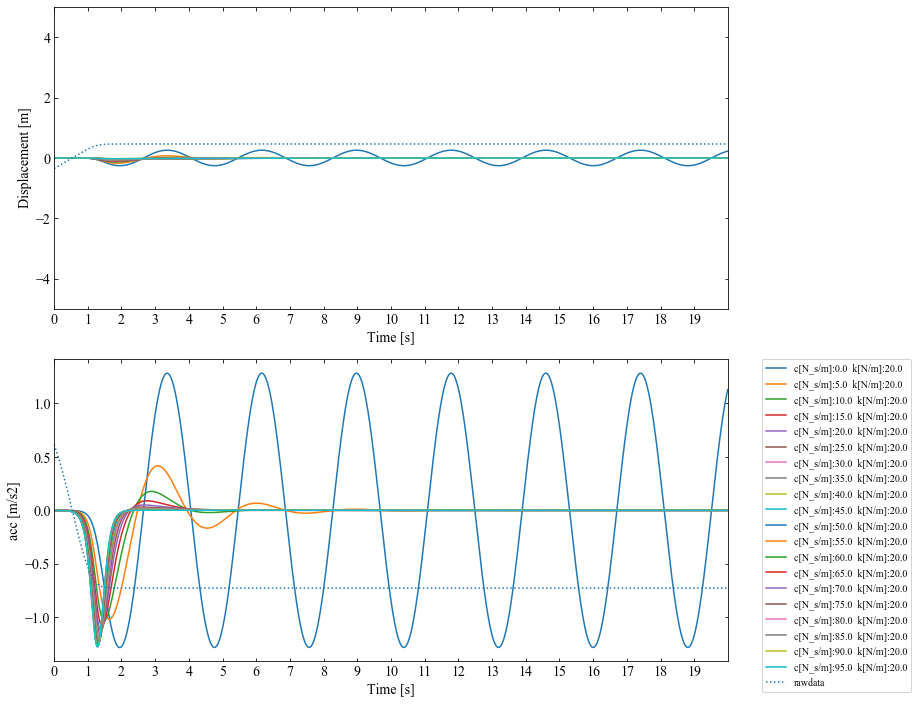

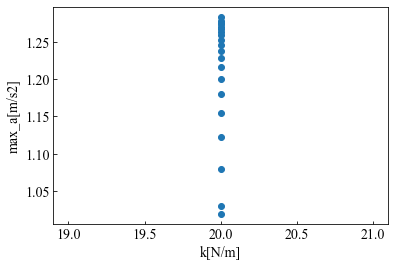

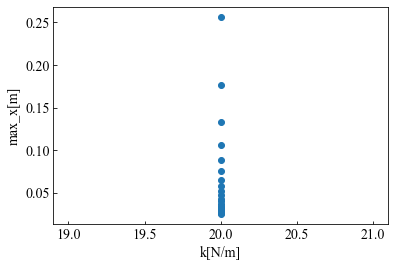

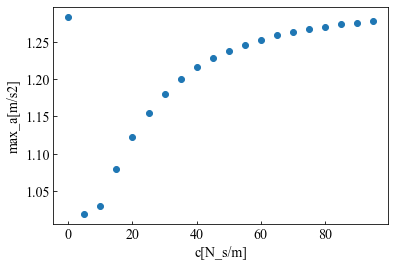

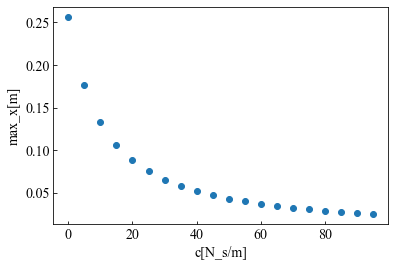

In [21]:
max_a_list = []
max_x_list = []

calc_k_list =[]
calc_c_list =[]

k = 20
# c = 50

# ここからグラフ描画
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(221)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Displacement [m]')

# データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, tf, 0.005 *tf *10))
# ax1.set_yticks(np.arange(-1, 1, 0.1))
ax1.set_xlim(0, tf)
ax1.set_ylim(-5, 5)

ax2 = fig.add_subplot(223)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('acc [m/s2]')

# データの範囲と刻み目盛を明示する。
ax2.set_xticks(np.arange(0, tf, 0.005 *tf *10))
ax2.set_xlim(0, tf)

# for k in range(2, 3, 5):
# for c in range(0, 1, 1):
# for k in range(0, 100,5 ):
for c in range(0, 100, 5 ):
    calc_k = k/1
    calc_c = c/1
    calc_k_list = np.append(calc_k_list,calc_k)
    calc_c_list = np.append(calc_c_list,calc_c)
    sol = odeint(func, state0, t, args=(m, calc_k , calc_c))            
    label_ck = "c[N_s/m]:" + str(calc_c) + "  k[N/m]:" + str(calc_k)
#             label_a = label_ck + "x"
#         ax1.plot(t, sol[:, 0], label=label_ck )  # 絶対変位量
    x_list = funcx(t) - sol[:, 0]
    ax1.plot(t, x_list, label=label_ck )  # 相対変位量
    max_x_list = np.append(max_x_list,max([np.max(x_list), abs(np.min(x_list))  ]))
#             ax1.plot(t, sol[:, 1], label=label_ck )  # 速度量

    a = diff(sol[:, 1] )
    max_a_list = np.append(max_a_list,max([np.max(a), abs(np.min(a))  ]))
    ax2.plot(t,a, label = label_ck)  # 加速度量

ax1.plot(t,funcx(t) ,linestyle="dotted" , label="rawdata")
acc_base = -2 * funcx(t) * (1 - pow( funcx(t),2 ))
ax2.plot(t,acc_base ,linestyle="dotted" , label="rawdata")

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10 )
plt.show()
plt.close()

#######################################################　以下２次元MAP

plt.plot(calc_k_list,max_a_list,marker="o",linestyle='None')
# plt.set_ylim(0,1)
plt.xlabel("k[N/m]")
plt.ylabel("max_a[m/s2]")
# plt.ylim(0,10)
plt.show()


plt.plot(calc_k_list,max_x_list,marker="o",linestyle='None')
# plt.set_ylim(0,1)
plt.xlabel("k[N/m]")
plt.ylabel("max_x[m]")
# plt.ylim(0,10)
plt.show()

plt.plot(calc_c_list,max_a_list,marker="o",linestyle='None')
# plt.set_ylim(0,1)
plt.xlabel("c[N_s/m]")
plt.ylabel("max_a[m/s2]")
# plt.ylim(0,10)
plt.show()


plt.plot(calc_c_list,max_x_list,marker="o",linestyle='None')
# plt.set_ylim(0,1)
plt.xlabel("c[N_s/m]")
plt.ylabel("max_x[m]")
# plt.ylim(0,10)
plt.show()



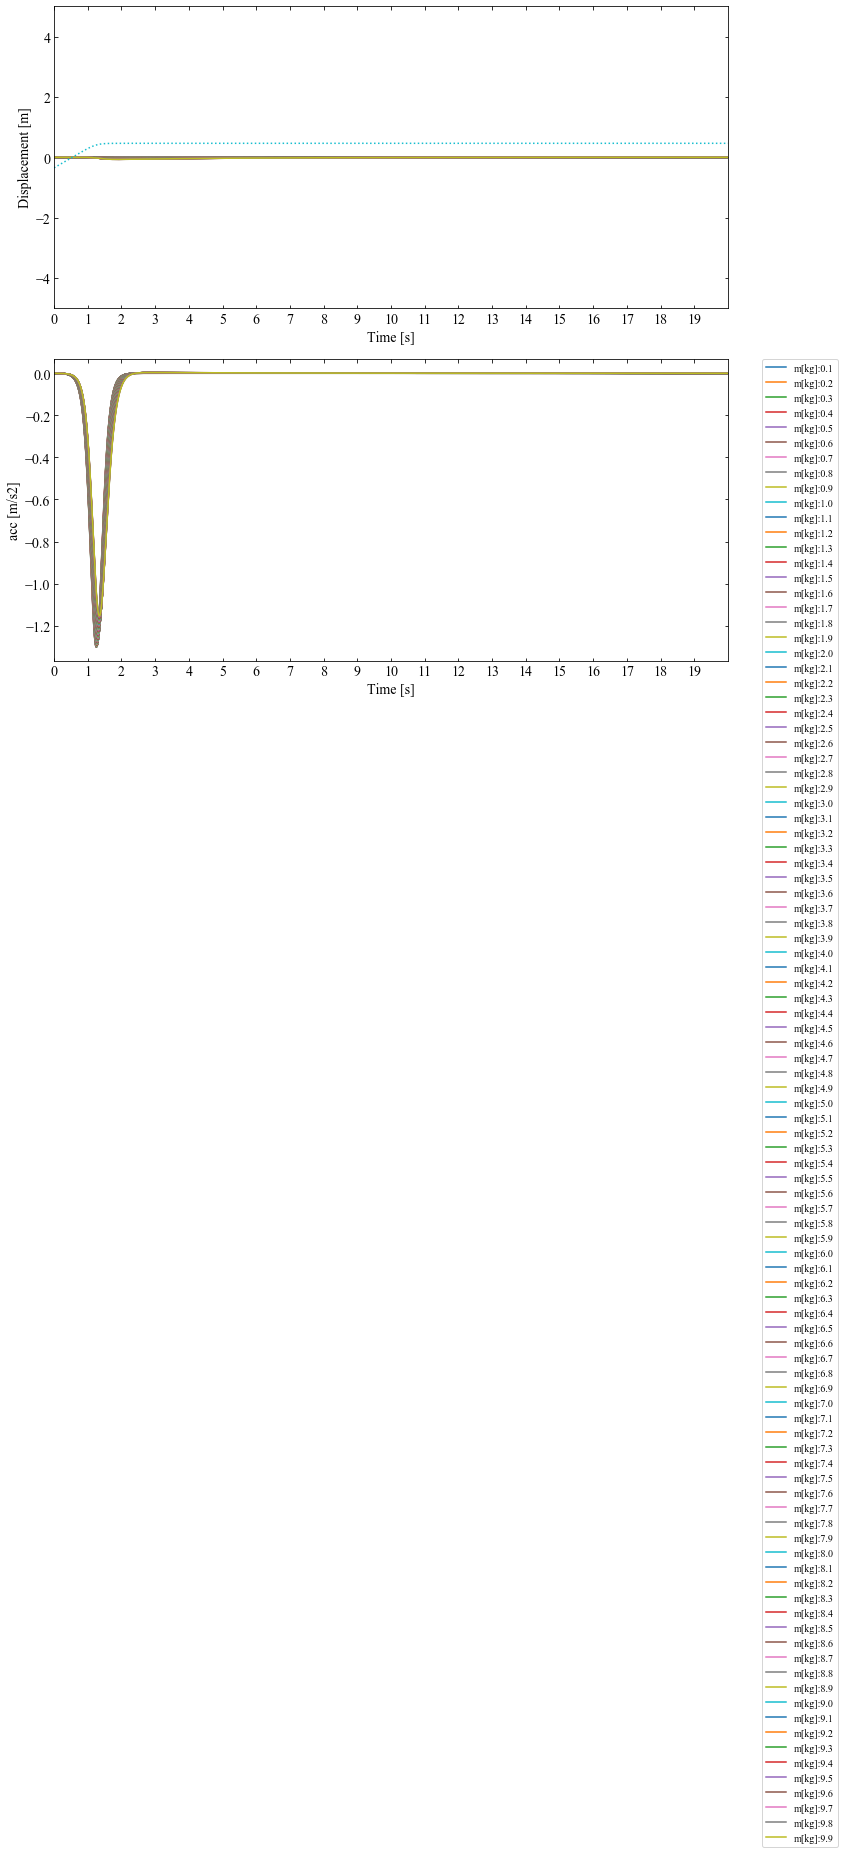

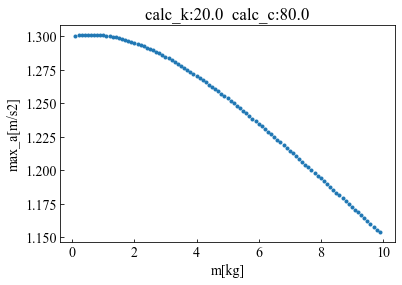

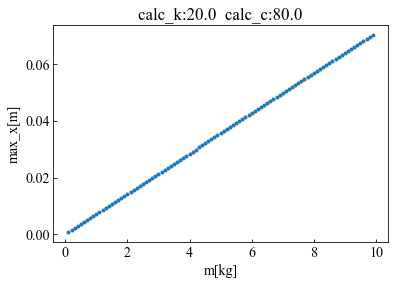

In [28]:

# ここからグラフ描画
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(221)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Displacement [m]')

# データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, tf, 0.005 *tf *10))
# ax1.set_yticks(np.arange(-1, 1, 0.1))
ax1.set_xlim(0, tf)
ax1.set_ylim(-5, 5)

ax2 = fig.add_subplot(223)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('acc [m/s2]')

# データの範囲と刻み目盛を明示する。
ax2.set_xticks(np.arange(0, tf, 0.005 *tf *10))
ax2.set_xlim(0, tf)


max_a_list = []
max_x_list = []

calc_m_list =[]
# calc_c_list =[]

k = 20
c=  80

for m in range(1, 100,1 ):
    calc_k = k/1
    calc_c = c/1
    calc_m = m/10
#     calc_k_list = np.append(calc_k_list,calc_k)
#     calc_c_list = np.append(calc_c_list,calc_c)
    calc_m_list = np.append(calc_m_list,calc_m)
    sol = odeint(func, state0, t, args=(calc_m, calc_k , calc_c))            
#     label_ck = "c[N_s/m]:" + str(calc_c) + "  k[N/m]:" + str(calc_k)
    label_ck = "m[kg]:" + str(calc_m)
#             label_a = label_ck + "x"
#         ax1.plot(t, sol[:, 0], label=label_ck )  # 絶対変位量
    x_list = funcx(t) - sol[:, 0]
    ax1.plot(t, x_list, label=label_ck )  # 相対変位量
    max_x_list = np.append(max_x_list,max([np.max(x_list), abs(np.min(x_list))  ]))
#             ax1.plot(t, sol[:, 1], label=label_ck )  # 速度量

    a = diff(sol[:, 1] )
    max_a_list = np.append(max_a_list,max([np.max(a), abs(np.min(a))  ]))
    ax2.plot(t,a, label = label_ck)  # 加速度量

ax1.plot(t,funcx(t) ,linestyle="dotted" , label="rawdata")

fig.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10 )
plt.show()
plt.close()


#######################################################　以下２次元MAP

label_ck = "calc_k:" + str(calc_k) + "  calc_c:" +  str(calc_c)
plt.title(label=label_ck )
plt.plot(calc_m_list,max_a_list,marker=".",linestyle='None')
# plt.set_ylim(0,1)
plt.xlabel("m[kg]")
plt.ylabel("max_a[m/s2]")
# plt.ylim(0,10)
plt.show()

label_ck = "calc_k:" + str(calc_k) + "  calc_c:" +  str(calc_c)
plt.title(label=label_ck )
plt.plot(calc_m_list,max_x_list,marker=".",linestyle='None')
# plt.set_ylim(0,1)
plt.xlabel("m[kg]")
plt.ylabel("max_x[m]")
# plt.ylim(0,10)
plt.show()


#######################################################　以下２次元MAP

# rt_len = math.sqrt(len(max_x_list))

# max_x_list = np.resize(max_x_list , (int(rt_len),int(rt_len)))

# limit_calc_k_list = []
# limit_calc_c_list = []
# limit_max_a_list = []

# for i in range(len(max_x_list)):
#     for j in range(len(max_x_list[i])):
#         if 0.03 > max_x_list[i][j]:
#             limit_calc_c_list.append(calc_c_list[i * 10 + j ])
#             limit_calc_k_list.append(calc_k_list[i * 10 + j ])
#             limit_max_a_list.append(max_a_list[i * 10 + j ])
#             break
# #             print(calc_k_list[i * 10 + j ])
# #             print(calc_c_list[i * 10 + j ])

# # print(len(limit_calc_a_list))
# # print(len(limit_calc_a_list))
# # print(len(limit_calc_a_list))

# plt.plot(limit_calc_k_list,limit_calc_c_list,marker="o",linestyle='None')
# for i in range(len(limit_max_a_list) ):
#     plt.text(limit_calc_k_list[i] + 2,limit_calc_c_list[i] +2, str(round(limit_calc_a_list[i], 2)) )
    
# # plt.set_ylim(0,200)
# plt.xlabel("k[N/m]")
# plt.ylabel("c[N_s/m]")
# plt.xlim(0,200)
# plt.ylim(0,200)

# plt.show()



In [ ]:
tf = 10
dt = 0.005

def funcx(t):
    return np.tanh(t-5 )

t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002

def func(state,t ):
    x,v= state
    a =  -2 * x * (1 - pow( x,2 ))
    return [v,a]

#     v1 = 1 / 2 /pow( np.cosh(t-np.pi),2 )
#     v2 = 1 - pow( x,2 )
#     a1 =  -2 * x * (1 - pow( x,2 ))

m=0
t0 =0

state0 = [funcx(t0) , 1 - pow( funcx(t0) ,2 )  ]

sol = odeint(func, state0, t )            
# label_ck = "c[N_s/m]:" + str(calc_c) + "  k[N/m]:" + str(calc_k)
plt.plot(t, sol[:, 0],label="sol_x" )  # 変位量
plt.plot(t, sol[:, 1],label="sol_v" )  # 速度


# 心の値
plt.plot(t, funcx(t), label="x")
plt.plot(t, 1 - pow( funcx(t),2 ), label="v")

# plt.plot(t, a1, label="a1")

# 凡例の表示
plt.legend( loc='upper left', borderaxespad=0, fontsize=10)

# プロット表示(設定の反映)
import nuplt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diff(x):
    v = []
    for i in range(len(t)-1):
        v = np.append(v,(x[i +1] - x[i]) / dt )
    v=np.append(v,v[len(v) -1])    
    return v

t0 = 0                          # 初期時間[s]
tf = 10
dt = 0.005

t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002

# for i in range(len(t)):
x = np.log(np.cosh(t -5)) +t 
v =  np.tanh(t-5 ) + 1
a = 1 - pow( np.tanh(t-5 ),2 )
# a1 =  -2 * x * (1 - pow( x,2 ))


v1=[]
a1=[]

v1 = diff(x)
a1 = diff(v1)

    
# プロット
plt.plot(t, x, label="x")
plt.plot(t, v, label="v")
plt.plot(t, a, label="a")

# plt.plot(t, x1, label="x1")
plt.plot(t, v1, label="v1")
plt.plot(t, a1, label="a1")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diff(x):
    v = []
    for i in range(len(t)-1):
        v = np.append(v,(x[i +1] - x[i]) / dt )
    v=np.append(v,v[len(v) -1])    
    return v

t0 = 0                          # 初期時間[s]
tf = 10
dt = 0.005

t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002

n =2

x = 1/n * np.log(np.cosh((n*t -5))) 
v =  np.tanh((n*t-5 ))  
a = n - n* pow( v ,2 )

# x = 1/n * np.log(np.cosh((n*t -5))) +t
# v =  np.tanh((n*t-5 ))  +1
# a = n - n* pow( v -1,2 )

# a1 =  -2 * x * (1 - pow( x,2 ))

# x = np.log(np.cosh((t -5))) 
# v =  np.tanh((t-5 ))  
# a = 1 - pow( v ,2 )

# x1 = 1/n *np.log(np.cosh( n* t -5)) 
# v1 = np.tanh(n *t-5 ) 
# a1 = n - n * pow( v1 -1,2 )


v1=[]
a1=[]

v1 = diff(x)
a1 = diff(v1)

# プロット
plt.plot(t, x, label="x")
plt.plot(t, v, label="v")
plt.plot(t, a, label="a")

# plt.plot(t, x1, label="x1")
plt.plot(t, v1, label="v1")
plt.plot(t, a1, label="a1")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diff(x):
    v = []
    for i in range(len(t)-1):
        v = np.append(v,(x[i +1] - x[i]) / dt )
    v=np.append(v,v[len(v) -1])    
    return v

t0 = 0                          # 初期時間[s]
tf = 5
dt = 0.005

t = np.arange(t0, tf+dt, dt)    # 時間軸配列
# print(t.size) #2002


b = 8
# a = 2 / 0.65

x = (-1 / b * np.log(np.cosh(b * t - 5)) + t) / 3.077
#     return np.log(np.cosh( t -5)) 

v = ( -1* np.tanh((b * t - 5 )) + 1) / 3.077
# w = 1 - pow( np.tanh((t-5 )) ,2 )

v1=[]
a1=[]

v1 = diff(y)
a1 = diff(v1)

# プロット
# plt.plot(t, x, label="np.cosh(t -5)")
plt.plot(t, x, label="- 1 / (a * b) * np.log(np.cosh(b * t -5)) + t / a")
plt.plot(t, v, label=" - 1 / a * np.tanh((b * t-5 )) + 1 /a")
# plt.plot(t, w, label="1 - pow( np.tanh((t-5 )) ,2 )")

# # plt.plot(t, x1, label="x1")
# plt.plot(t, v1, label="v1")
# plt.plot(t, a1, label="a1")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()